# 1 INTRODUCTION

I have always been passionate about video games and then esports. Then, I came across this dataset and I thought it would be interesting to explore the trends in the industry. I hope you enjoy this notebook as much as I enjoyed creating it.

Esports (also known as electronic sports, e-sports, or eSports) is a form of competition using video games. Most commonly, esports takes the form of organized, multiplayer video game competitions, particularly between professional players, individually or as teams. Esports often takes the form of organized, multiplayer video game competitions, particularly between professional players, individually or as teams. Although organized competitions have long been a part of video game culture, these were largely between amateurs until the late 2000s when participation by professional gamers of all ages and amateur competitors from around the world began to take place on a more regular basis. Esports is also a multi-million dollar industry with several professional players and teams earning six-figure salaries from sponsors and prize money [here](wikipedia.org/wiki/Esports).

This notebook will explore the trends in the industry from 1998 to 2023. The data used in this notebook is from [Esports Earnings](https://www.esportsearnings.com/). The data is available in csv format and can be downloaded from [here](https://www.kaggle.com/datasets/rankirsh/esports-earnings). The data is updated monthly and the latest data is from 2023-02-01.

This analysis was inspired by [this](https://www.kaggle.com/code/rankirsh/esports-earnings-analysis/report) notebook.

# 2 DATA PREPARATION

In this section, we will import the necessary libraries, load the data and perform some data cleaning.

## 2.1 Importing libraries

In [50]:
import pandas as pd
import plotly.express as px
import chart_studio
import chart_studio.plotly as py

# Use to display figures in the github
import plotly.io as pio
pio.renderers.default = "svg"

# set chart studio credentials
# chart_studio.tools.set_credentials_file(username='your_username', api_key='your_api_key')


## 2.2 Creating datasets from the csv files

In [51]:
# Import the general esports data to a dataframe
general_esports_data = pd.read_csv('general_esports_data.csv')

# Import the historical esports data to a dataframe
historical_esports_data = pd.read_csv('historical_esports_data.csv')

In [52]:
# Display the general dataset
general_esports_data

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,444285.71,321936.22,396,219
1,Age of Empires II,1999,Strategy,2908907.99,1040533.59,1825,1425
2,Age of Empires III,2005,Strategy,113893.65,41800.00,164,141
3,Age of Empires IV,2021,Strategy,816785.68,408438.41,411,247
4,Age of Empires Online,2011,Strategy,7996.56,775.00,38,39
...,...,...,...,...,...,...,...
624,Mobile Suit Gundam: Extreme Vs Maxi Boost ON,2016,Third-Person Shooter,420.00,320.00,12,2
625,Rogue Company,2020,Third-Person Shooter,50000.00,0.00,48,2
626,The Division 2,2019,Third-Person Shooter,27250.00,0.00,40,2
627,Beat Saber,2019,Music / Rhythm Game,16175.56,0.00,58,10


In [53]:
# Display the historical dataset
historical_esports_data

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.0,8,1
1,1998-05-01,Quake II,14600.0,4,1
2,1998-05-01,QuakeWorld,300.0,3,1
3,1998-07-01,Quake II,15000.0,5,1
4,1998-07-01,QuakeWorld,6500.0,4,1
...,...,...,...,...,...
8553,2023-01-01,Age of Empires Online,460.0,3,2
8554,2023-01-01,F1 22,324.0,3,1
8555,2023-01-01,Age of Mythology,240.0,4,2
8556,2023-01-01,Diabotical,170.0,5,8


## 2.3 Treatment of null values

In [54]:
# Describe the general dataset
general_esports_data.describe()

,ReleaseDate,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
count,629.000000,6.290000e+02,6.290000e+02,629.00000,629.000000
mean,2012.359300,2.324779e+06,1.649442e+06,213.18283,88.534181
std,7.335977,1.630670e+07,1.305773e+07,901.37956,452.486820
min,1981.000000,0.000000e+00,0.000000e+00,0.00000,0.000000
25%,2007.000000,1.000000e+03,0.000000e+00,4.00000,1.000000
50%,2015.000000,3.220846e+04,1.175000e+04,20.00000,4.000000
75%,2018.000000,2.457665e+05,1.455522e+05,97.00000,26.000000
max,2022.000000,3.118790e+08,2.808521e+08,15531.00000,6817.000000


In [55]:
# Sums the null values in the general dataset
general_esports_data.isnull().sum()

Game                0
ReleaseDate         0
Genre               0
TotalEarnings       0
OnlineEarnings      0
TotalPlayers        0
TotalTournaments    0
dtype: int64

In [56]:
# Sums the null values in the historical dataset
historical_esports_data.isnull().sum()

Date           0
Game           0
Earnings       0
Players        0
Tournaments    0
dtype: int64

The data does not have any null values. If there are any null values, they can be treated by replacing them with the mean or median of the column. Also, the rows with null values can be dropped. The approach to be taken depends on the data and the problem at hand. In this case, the data is not missing any values and hence, no treatment is required.

## 2.4 Treatment of dates

The date will be converted to datetime format and will be split into year and month. The year and month will be used to create a new columns called 'Year' and 'Month'. The day will not be considered as it is not relevant to the analysis.

In [57]:
# Transform the 'Date' column to datetime format in historical_esports_data
historical_esports_data['Date'] = pd.to_datetime(historical_esports_data['Date'])

# Display dataframe
historical_esports_data


,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.0,8,1
1,1998-05-01,Quake II,14600.0,4,1
2,1998-05-01,QuakeWorld,300.0,3,1
3,1998-07-01,Quake II,15000.0,5,1
4,1998-07-01,QuakeWorld,6500.0,4,1
...,...,...,...,...,...
8553,2023-01-01,Age of Empires Online,460.0,3,2
8554,2023-01-01,F1 22,324.0,3,1
8555,2023-01-01,Age of Mythology,240.0,4,2
8556,2023-01-01,Diabotical,170.0,5,8


## 2.5 Adding Year and Month columns

In [58]:

# Add new column 'Year' to historical_esports_data
historical_esports_data['Year'] = pd.DatetimeIndex(historical_esports_data['Date']).year

# Add new column 'Month' to historical_esports_data
historical_esports_data['Month'] = pd.DatetimeIndex(historical_esports_data['Date']).month

# Display dataframe
historical_esports_data

,Date,Game,Earnings,Players,Tournaments,Year,Month
0,1998-01-01,QuakeWorld,15000.0,8,1,1998,1
1,1998-05-01,Quake II,14600.0,4,1,1998,5
2,1998-05-01,QuakeWorld,300.0,3,1,1998,5
3,1998-07-01,Quake II,15000.0,5,1,1998,7
4,1998-07-01,QuakeWorld,6500.0,4,1,1998,7
...,...,...,...,...,...,...,...
8553,2023-01-01,Age of Empires Online,460.0,3,2,2023,1
8554,2023-01-01,F1 22,324.0,3,1,2023,1
8555,2023-01-01,Age of Mythology,240.0,4,2,2023,1
8556,2023-01-01,Diabotical,170.0,5,8,2023,1


## 2.6 Editing some 'Genre' names to become shorter to be able to plot them properly

In [59]:
# Display unique values in 'Genre' column
general_esports_data['Genre'].unique()

array(['Strategy', 'First-Person Shooter',
       'Multiplayer Online Battle Arena', 'Role-Playing Game',
       'Fighting Game', 'Racing', 'Sports', 'Collectible Card Game',
       'Puzzle Game', 'Battle Royale', 'Third-Person Shooter',
       'Music / Rhythm Game'], dtype=object)

In [60]:
# Edit the 'Genre' column in general_esports_data and replace the values with the following:
# 'Multiplayer Online Battle Arena' to 'MOBA'
# 'Role-Playing Game' to 'RPG'
# 'First-Person Shooter' to 'FPS'
# 'Third-Person Shooter' to 'TPS'
# 'Real-Time Strategy' to 'RTS'
general_esports_data['Genre'] = general_esports_data['Genre'].replace(['Multiplayer Online Battle Arena', 'Role-Playing Game', 'First-Person Shooter', 'Third-Person Shooter', 'Real-Time Strategy'], ['MOBA', 'RPG', 'FPS', 'TPS', 'RTS'])

# Display unique new values in 'Genre' column
general_esports_data['Genre'].unique()

array(['Strategy', 'FPS', 'MOBA', 'RPG', 'Fighting Game', 'Racing',
       'Sports', 'Collectible Card Game', 'Puzzle Game', 'Battle Royale',
       'TPS', 'Music / Rhythm Game'], dtype=object)

### 2.7 Removing games which do not fit in this analysis

This approach is to remove games which are not relevant to this analysis. According to the following criteria:
      * The game must have earnings of at least $500.
      * The game must have been played in at least 5 tournaments and total prize money of at least $2,000.

In [61]:
# Display the general dataset
general_esports_data

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,444285.71,321936.22,396,219
1,Age of Empires II,1999,Strategy,2908907.99,1040533.59,1825,1425
2,Age of Empires III,2005,Strategy,113893.65,41800.00,164,141
3,Age of Empires IV,2021,Strategy,816785.68,408438.41,411,247
4,Age of Empires Online,2011,Strategy,7996.56,775.00,38,39
...,...,...,...,...,...,...,...
624,Mobile Suit Gundam: Extreme Vs Maxi Boost ON,2016,TPS,420.00,320.00,12,2
625,Rogue Company,2020,TPS,50000.00,0.00,48,2
626,The Division 2,2019,TPS,27250.00,0.00,40,2
627,Beat Saber,2019,Music / Rhythm Game,16175.56,0.00,58,10


In [62]:
# Filter the general_esports_data dataframe to Games that 'TotalEarnings' is greater than $500 in prize money
# or 'TotalTournaments' greater than 5 and 'TotalEarnings' greater than $2,000 in prize money
general_esports_data = general_esports_data[(general_esports_data['TotalEarnings'] > 500) | ((general_esports_data['TotalTournaments'] > 5) & (general_esports_data['TotalEarnings'] > 2000))]

general_esports_data

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,444285.71,321936.22,396,219
1,Age of Empires II,1999,Strategy,2908907.99,1040533.59,1825,1425
2,Age of Empires III,2005,Strategy,113893.65,41800.00,164,141
3,Age of Empires IV,2021,Strategy,816785.68,408438.41,411,247
4,Age of Empires Online,2011,Strategy,7996.56,775.00,38,39
...,...,...,...,...,...,...,...
622,Gears of War: Ultimate Edition,2015,TPS,170000.00,170000.00,39,3
625,Rogue Company,2020,TPS,50000.00,0.00,48,2
626,The Division 2,2019,TPS,27250.00,0.00,40,2
627,Beat Saber,2019,Music / Rhythm Game,16175.56,0.00,58,10


In [63]:
# Display the historical dataset
historical_esports_data

,Date,Game,Earnings,Players,Tournaments,Year,Month
0,1998-01-01,QuakeWorld,15000.0,8,1,1998,1
1,1998-05-01,Quake II,14600.0,4,1,1998,5
2,1998-05-01,QuakeWorld,300.0,3,1,1998,5
3,1998-07-01,Quake II,15000.0,5,1,1998,7
4,1998-07-01,QuakeWorld,6500.0,4,1,1998,7
...,...,...,...,...,...,...,...
8553,2023-01-01,Age of Empires Online,460.0,3,2,2023,1
8554,2023-01-01,F1 22,324.0,3,1,2023,1
8555,2023-01-01,Age of Mythology,240.0,4,2,2023,1
8556,2023-01-01,Diabotical,170.0,5,8,2023,1


In [64]:
# Filter the historical_esports_data dataframe to Games that 'Earnings' is greater than $500 in prize money
# or 'Tournaments' greater than 5 and 'Earnings' greater than $2,000 in prize money
historical_esports_data = historical_esports_data[(historical_esports_data['Earnings'] > 500) | ((historical_esports_data['Tournaments'] > 5) & (historical_esports_data['Earnings'] > 2000))]

# Display the historical dataset
historical_esports_data

,Date,Game,Earnings,Players,Tournaments,Year,Month
0,1998-01-01,QuakeWorld,15000.00,8,1,1998,1
1,1998-05-01,Quake II,14600.00,4,1,1998,5
3,1998-07-01,Quake II,15000.00,5,1,1998,7
4,1998-07-01,QuakeWorld,6500.00,4,1,1998,7
5,1998-11-01,Quake II,36600.00,13,2,1998,11
...,...,...,...,...,...,...,...
8548,2023-01-01,Trackmania (2020),3510.40,36,10,2023,1
8549,2023-01-01,Age of Empires IV,3328.20,42,8,2023,1
8550,2023-01-01,Age of Empires,1329.05,12,3,2023,1
8551,2023-01-01,osu!,1225.00,18,1,2023,1


## 3 Exploratory Analysis

In this section, the data will be explored to find trends in the Esports industry.

#### 3.1 Biggest Games (Earnings)

Exploring the top 10 games with the highest earnings.

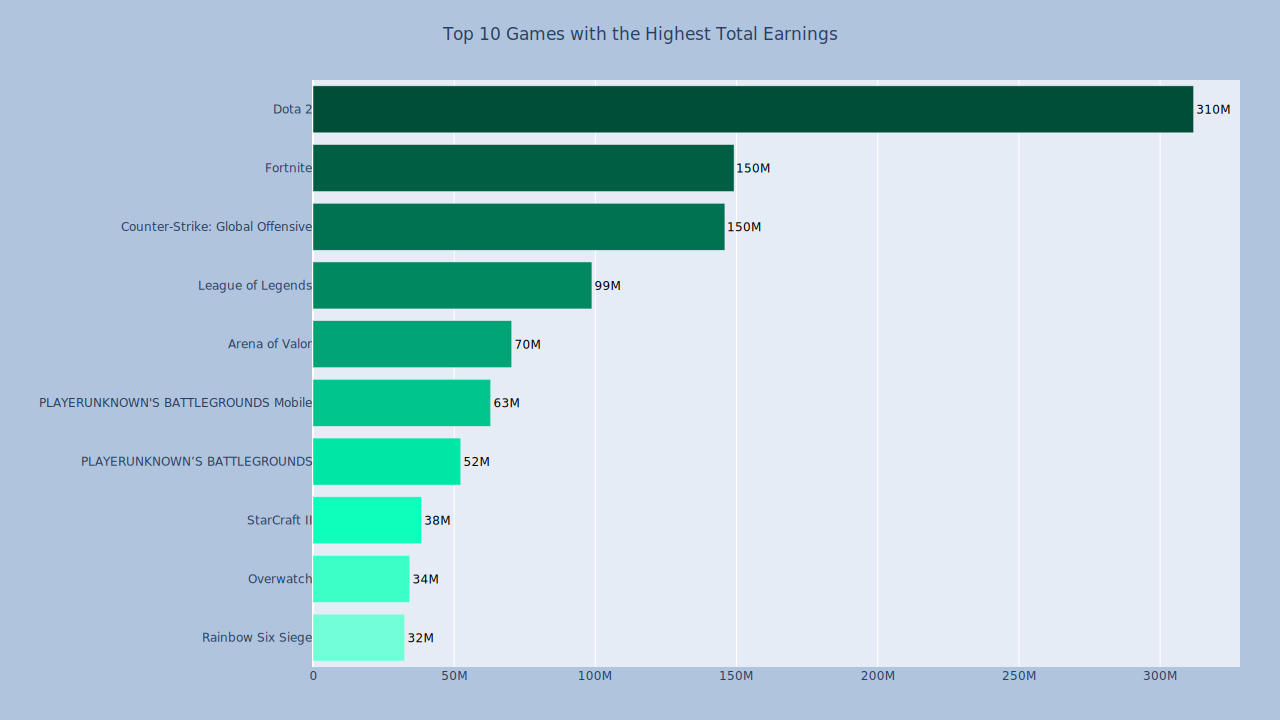

In [65]:
# Plot the top 10 games with the highest 'TotalEarnings' in general_esports_data
fig = px.bar(general_esports_data.nlargest(10, 'TotalEarnings'),
             x='TotalEarnings', y='Game', orientation='h',
             title='Top 10 Games with the Highest Total Earnings',
             width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")
# Order the bars by the Total Earnings
fig.update_yaxes(categoryorder='total ascending')
# Display the Total Earnings in millions outside the bars
# and set the text color to black
fig.update_traces(texttemplate='%{x:.2s}', textposition='outside', textfont_color='black')
# Define bar color to be dark dark green to light green
fig.update_traces(marker_color=['#004E38', '#005E43', '#007151', '#008861', '#00A475', '#00C58D', '#00E6A5', '#0EFFBB', '#3CFFC8', '#72FFD7'])
# Centralize the title
fig.update_layout(title_x=0.5)
# Remove 'Game' label from the x-axis
fig.update_xaxes(title_text='')
# Remove 'Total Earnings' label from the y-axis
fig.update_yaxes(title_text='')

# # Display the plot
fig.show()

# fig.write_image("fig1.png")

# py.plot(fig, filename='top10_games_with_the_highest_total_earnings')


There are no surprise that in the top 10 games, the most popular games as Dota 2, Fortnite, CS:GO and League of Legends are present.

To go deeper into the analysis, let's see the prize evolution of the top 5 games with the highest earnings.

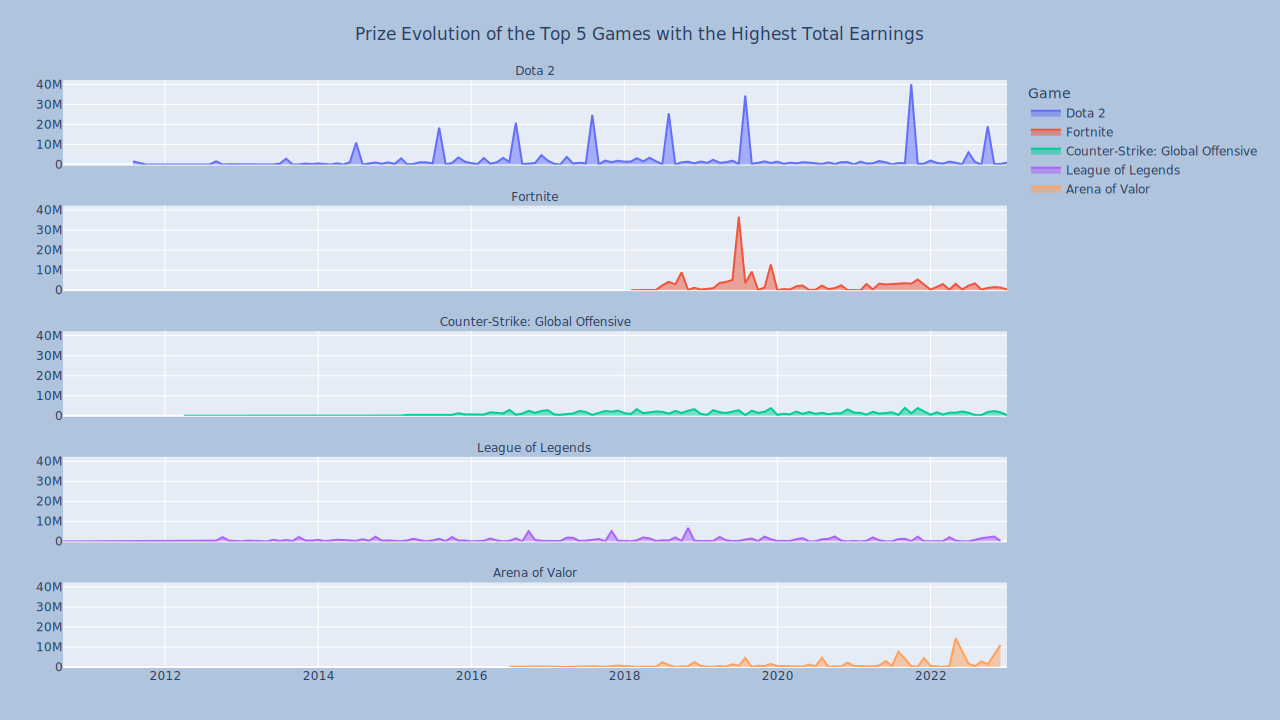

In [66]:
# Plot one figure with 5 subplots, this subplots will compare the Earnings in historical_esports_data of the top 5 games with the highest 'TotalEarnings' in general_esports_data
# Each subplot will be an area chart with the 'Earnings' in millions on the y-axis and the 'Date' on the x-axis
# The subplots will be arranged in 5 rows and 1 column
# The subplots will share the x-axis
# The subplots will not share the y-axis
# The subplots will have a title with the name of the game

fig = px.area(historical_esports_data[historical_esports_data['Game'].isin(general_esports_data.nlargest(5, 'TotalEarnings')['Game'])],
                x='Date', y='Earnings', color='Game',
                title='Prize Evolution of the Top 5 Games with the Highest Total Earnings',
                facet_col='Game', facet_col_wrap=1, facet_col_spacing=0.03,
                category_orders={'Game': general_esports_data.nlargest(5, 'TotalEarnings')['Game']},
                width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")

# Centralize the title
fig.update_layout(title_x=0.5)
# Remove 'Game=' from subplot titles
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# Remove 'Date' label from the x-axis
fig.update_xaxes(title_text='')
# Remove 'Earnings' label from the y-axis
fig.update_yaxes(title_text='')
# Format x-axis tick labels to display only the year
fig.update_layout(xaxis_tickformat='%Y')

# Display the figure
fig.show()

# fig.write_image("fig2.png")

# py.plot(fig, filename='prize_evolution_of_the_top_5_games_with_the_highest_total_earnings')


It is possible to see that the games distribution of prize is not uniform. Dota 2 and LOL, for example, distribute the prizes in a cyclical manner, with a peak in prize money every year. CS:GO, on the other hand, is more stable, with a more linear distribution. For Fortnite and Arena of Valor, the distribution of prizes is irregular.

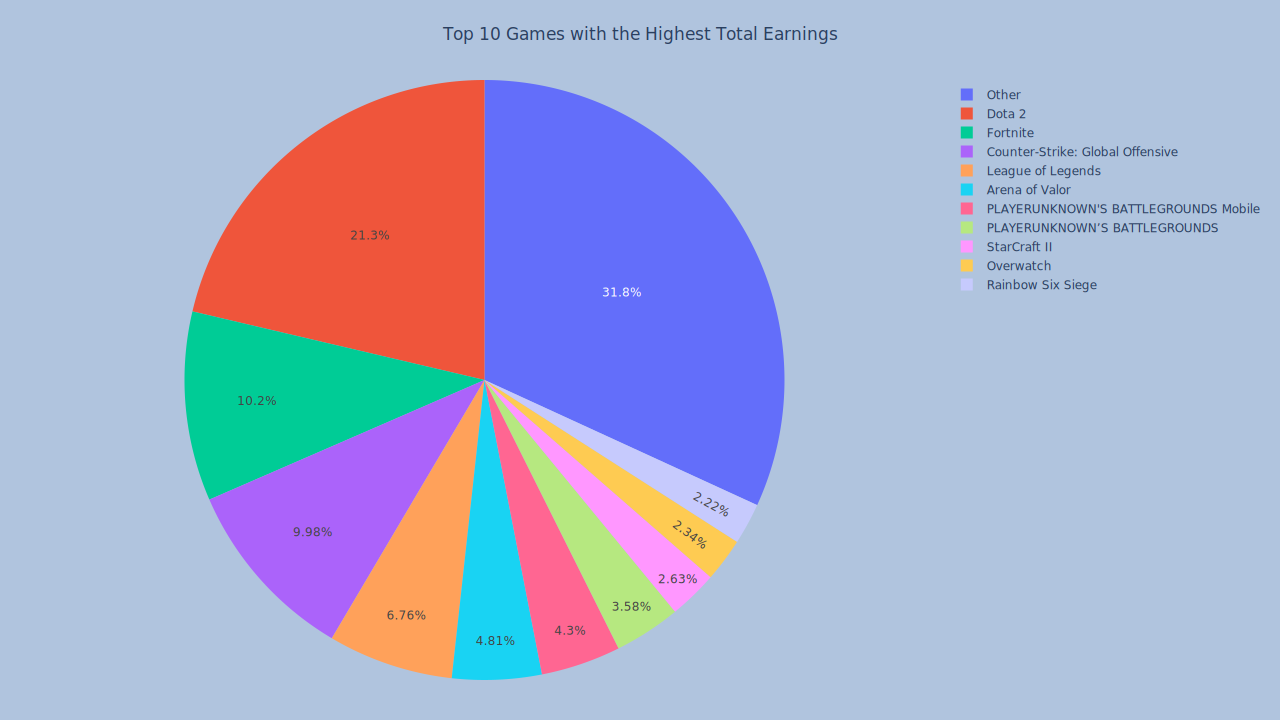

In [67]:
# Plot the top 10 games with the highest 'TotalEarnings' in general_esports_data
# Sum the rest of the games with the lowest 'TotalEarnings' in general_esports_data

fig = px.pie(pd.concat([general_esports_data.nlargest(10, 'TotalEarnings'), pd.DataFrame({'Game': ['Other'], 'TotalEarnings': [general_esports_data.nsmallest(len(general_esports_data) - 10, 'TotalEarnings')['TotalEarnings'].sum()]})]),
                values='TotalEarnings', names='Game',
                title='Top 10 Games with the Highest Total Earnings',
                width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")

# Centralize the title
fig.update_layout(title_x=0.5)

# Display figure
fig.show()

# fig.write_image("fig3.png")

# py.plot(fig, filename='esports_fig3')

The earnings are concentrated in few games. The top 4 games (Dota 2, Fortnite, CS:GO and League of Legends) represent almost 50% of the total earnings and about 70% of the total earnings are concentrated in the top 10 games. It is quite surprising that about a fifth of the total earnings are solely from Dota 2.    

### 3.2 Biggest Games (Tournaments)

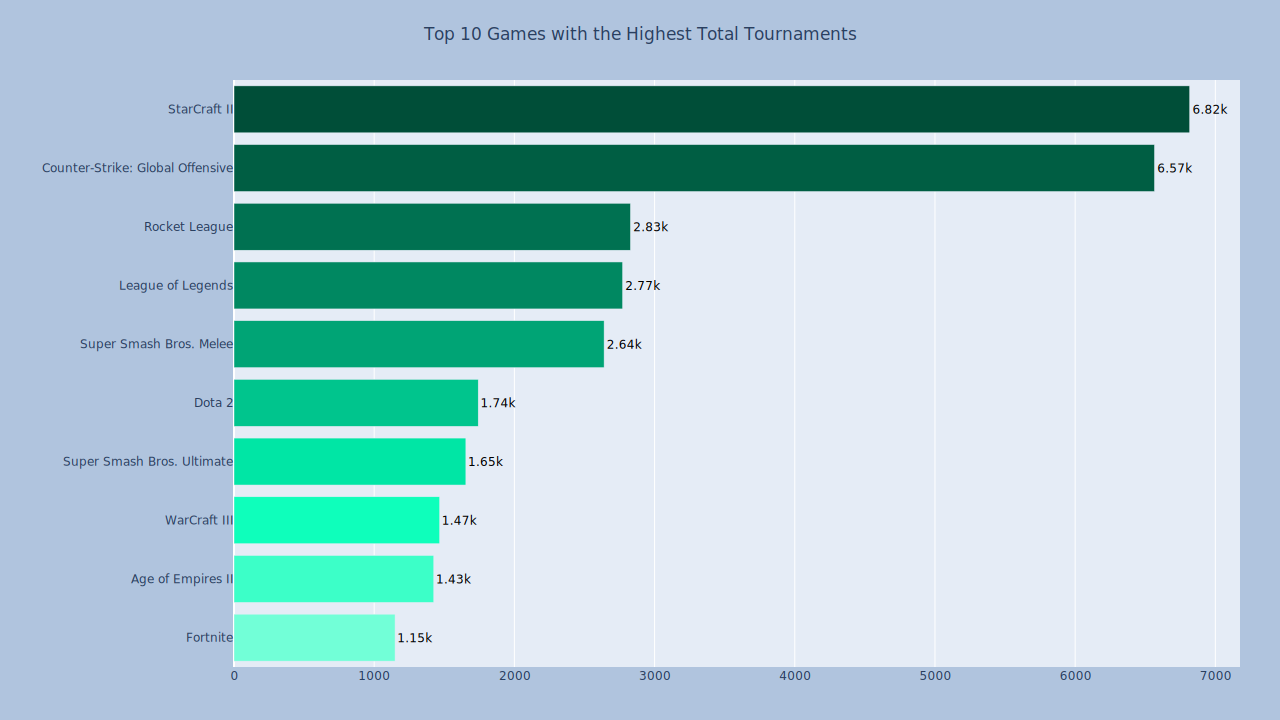

In [68]:
# Plot the top 10 games with the highest 'TotalTournaments' in general_esports_data using a horizontal bar chart
fig = px.bar(general_esports_data.nlargest(10, 'TotalTournaments'),
             x='TotalTournaments', y='Game', orientation='h',
             title='Top 10 Games with the Highest Total Tournaments',
             width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")

# Order the bars by the Total Earnings
fig.update_yaxes(categoryorder='total ascending')
# Display the Total Earnings in thousands inside the bars with 2 decimal places
# And set the text color to white
fig.update_traces(texttemplate='%{x:.3s}', textposition='outside', textfont_color='black')
# Define bar color to be dark dark green to light green
fig.update_traces(marker_color=['#004E38', '#005E43', '#007151', '#008861', '#00A475', '#00C58D', '#00E6A5', '#0EFFBB', '#3CFFC8', '#72FFD7'])
# Centralize the title
fig.update_layout(title_x=0.5)
# Remove 'Game' label from the x-axis
fig.update_xaxes(title_text='')
# Remove 'Total Earnings' label from the y-axis
fig.update_yaxes(title_text='')

# Display figure
fig.show()

# fig.write_image("fig4.png")

# py.plot(fig, filename='esports_fig4')

There is not a surprise that Dota 2, Fortnite, CS:GO and League of Legends are in both the two top 10 lists. Something that is interesting is that the top 10 games with the highest earnings are not the same as the top 10 games with the highest number of tournaments. This is because some games have a lot of tournaments but the prize money is not that high. For example, the game 'Rocket League' has 2.8 thousand tournaments but the prize money is only $27 million. On the other hand, the game 'Dota 2' has 1.7 thousand tournaments but the prize money is $311 million.

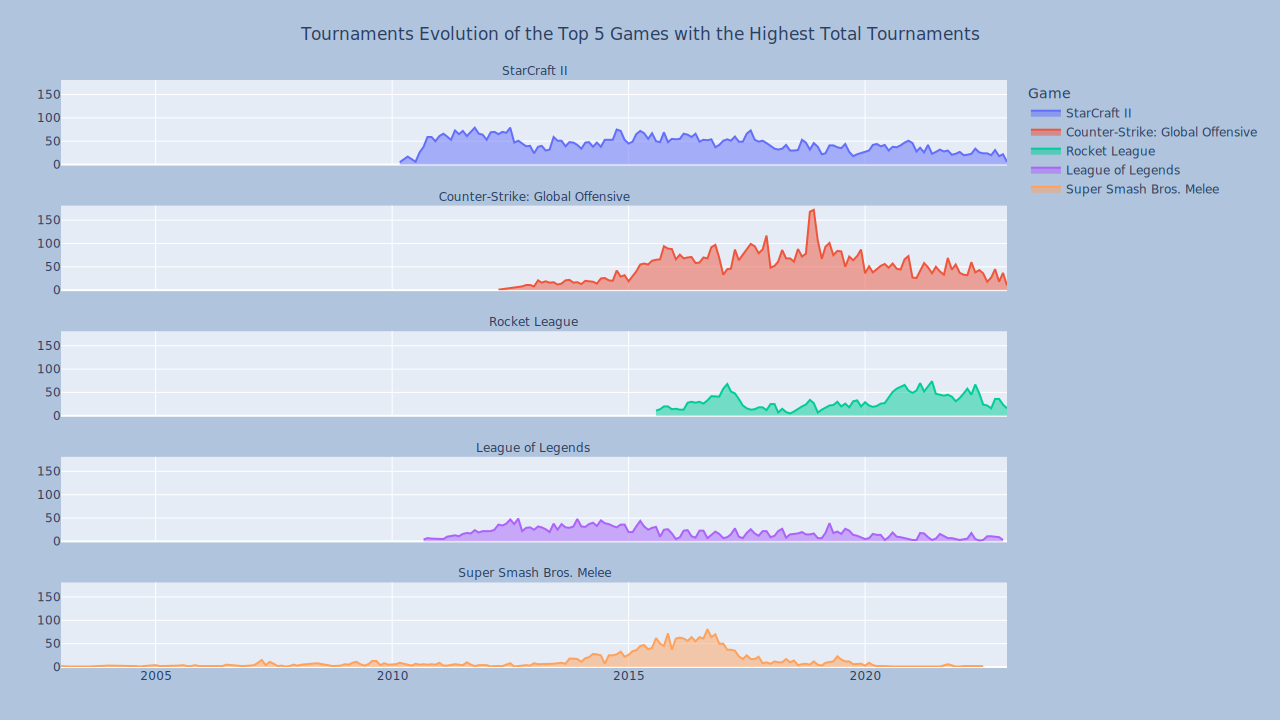

In [69]:
# Plot one figure with 5 subplots, this subplots will compare the Tournaments in historical_esports_data of the top 5 games with the highest 'TotalTournaments' in general_esports_data
# Each subplot will be an area chart with the 'Tournaments' in thousands on the y-axis and the 'Date' on the x-axis
# The subplots will be arranged in 5 rows and 1 column
# The subplots will share the x-axis
# The subplots will not share the y-axis
# The subplots will have a title with the name of the game
fig = px.area(historical_esports_data[historical_esports_data['Game'].isin(general_esports_data.nlargest(5, 'TotalTournaments')['Game'])],
                x='Date', y='Tournaments', color='Game',
                title='Tournaments Evolution of the Top 5 Games with the Highest Total Tournaments',
                facet_col='Game', facet_col_wrap=1, facet_col_spacing=0.03,
                category_orders={'Game': general_esports_data.nlargest(5, 'TotalTournaments')['Game']},
                width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")

# Centralize the title
fig.update_layout(title_x=0.5)
# Remove 'Game=' from subplot titles
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# Remove 'Date' label from the x-axis
fig.update_xaxes(title_text='')
# Remove 'Earnings' label from the y-axis
fig.update_yaxes(title_text='')
# Format x-axis tick labels to display only the year
fig.update_layout(xaxis_tickformat='%Y')

# Display the figure
fig.show()

# fig.write_image("fig5.png")

# py.plot(fig, filename='esports_fig5')

The tournament distribution between the top 4 games is similar. However, it is interesting to observe that 'Super Smash Bros. Melee' tournaments started in 2003 and only around 2014 the amount of tournaments started to increase, but the tournaments decreased around 2018 probably due to the release of 'Super Smash Bros. Ultimate' in the same year. 

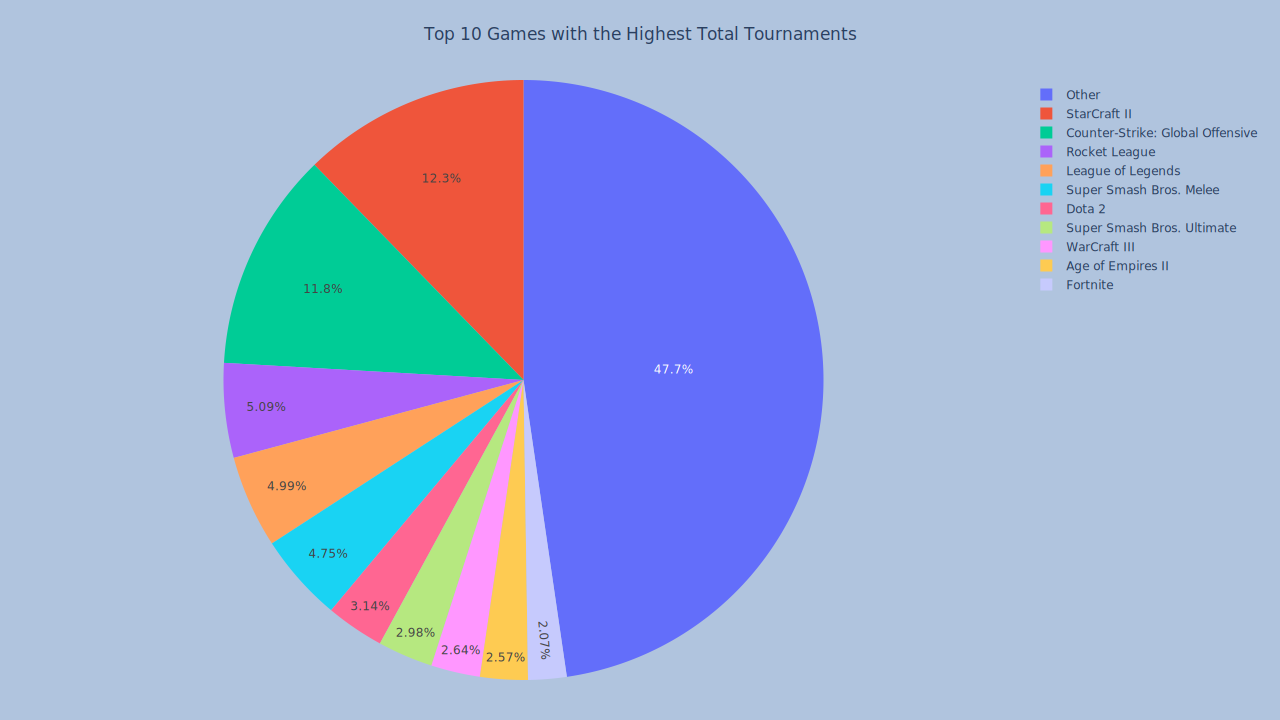

In [70]:
# Plot the top 10 games with the highest 'TotalTournaments' in general_esports_data
# Sum the rest of the games with the lowest 'TotalTournaments' in general_esports_data
fig = px.pie(pd.concat([general_esports_data.nlargest(10, 'TotalTournaments'), pd.DataFrame({'Game': ['Other'], 'TotalTournaments': [general_esports_data.nsmallest(len(general_esports_data) - 10, 'TotalTournaments')['TotalTournaments'].sum()]})]),
                values='TotalTournaments', names='Game',
                title='Top 10 Games with the Highest Total Tournaments',
                width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")

# Centralize the title
fig.update_layout(title_x=0.5)

fig.show()

# fig.write_image("fig6.png")

# py.plot(fig, filename='esports_fig6')

The tournaments are less concentrated than the earnings, which reflects the fact that there are more games with a lot of tournaments but with a low prize money.

### 3.3 Earnings and Tournaments Over Time

In this section, we will explore the evolution of the earnings and tournaments over time.

C:\Users\arthu\AppData\Local\Temp\ipykernel_17608\2994625802.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



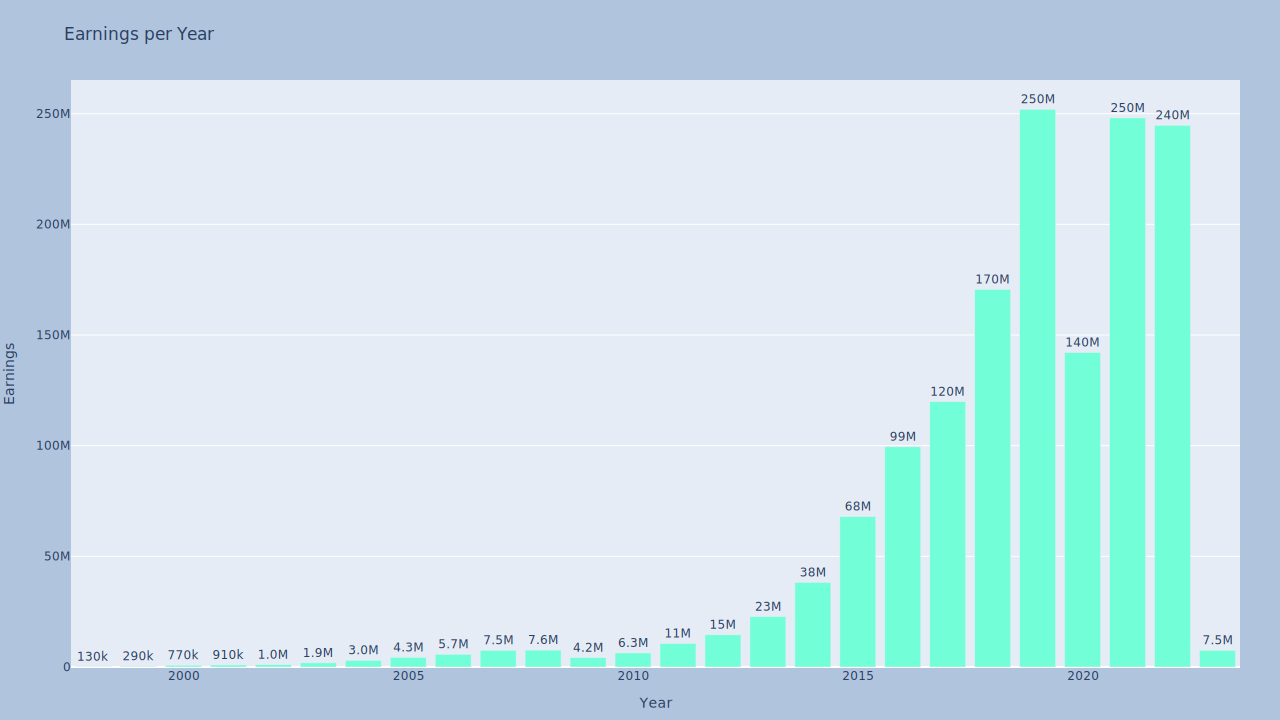

In [71]:
# Plot Earnings per Year from historical_esports_data
fig = px.bar(historical_esports_data.groupby('Year').sum().reset_index(),
                x='Year', y='Earnings',
                title='Earnings per Year',
                width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")

# Change the color of the bars to #72FFD7
fig.update_traces(marker_color='#72FFD7')
# Show the Earnings in thousands outside the bars with 2 decimal places
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside')

# Display the figure
fig.show()

# fig.write_image("fig7.png")

# py.plot(fig, filename='esports_fig7')

It is possible to see that the number of earnings increased over time. The Esports industry jumped from earnings in 2011 and 2012 and has achieved a total of $252 million in 2019.

It is interesting to observe that in 2009 due to the economic crisis and em 2020 due to the pandemic, the number of earnings decreased. Indeed the pandemic has strongly affected the esports scenario, but in 2021 and 2022 the number of earnings increased again. This demonstrates that the esports industry is resilient and is able to overcome adversities.

C:\Users\arthu\AppData\Local\Temp\ipykernel_17608\513101011.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



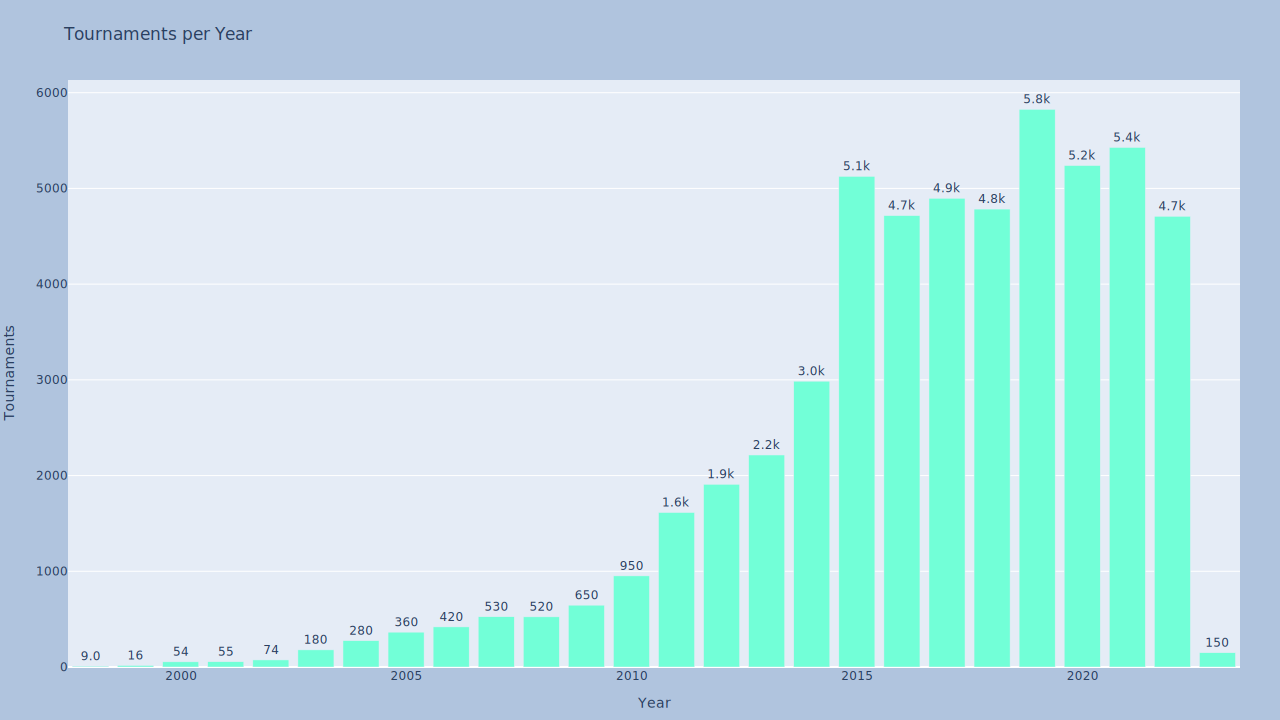

In [72]:
# Plot Tournaments per Year from historical_esports_data
fig = px.bar(historical_esports_data.groupby('Year').sum().reset_index(),
                x='Year', y='Tournaments',
                title='Tournaments per Year',
                width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")

# Change the color of the bars to #72FFD7
fig.update_traces(marker_color='#72FFD7')
# Show the Earnings in thousands outside the bars with 2 decimal places
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside')

# Display the figure
fig.show()

# fig.write_image("fig8.png")

# py.plot(fig, filename='esports_fig8')

The tournaments also increased over time. The number of tournaments started strongly increasing in 2011 and has stabilized from 2015 onwards with a mean of 5 thousand tournaments.

### 3.4 Earnings and Tournaments by Month

C:\Users\arthu\AppData\Local\Temp\ipykernel_17608\3875018303.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



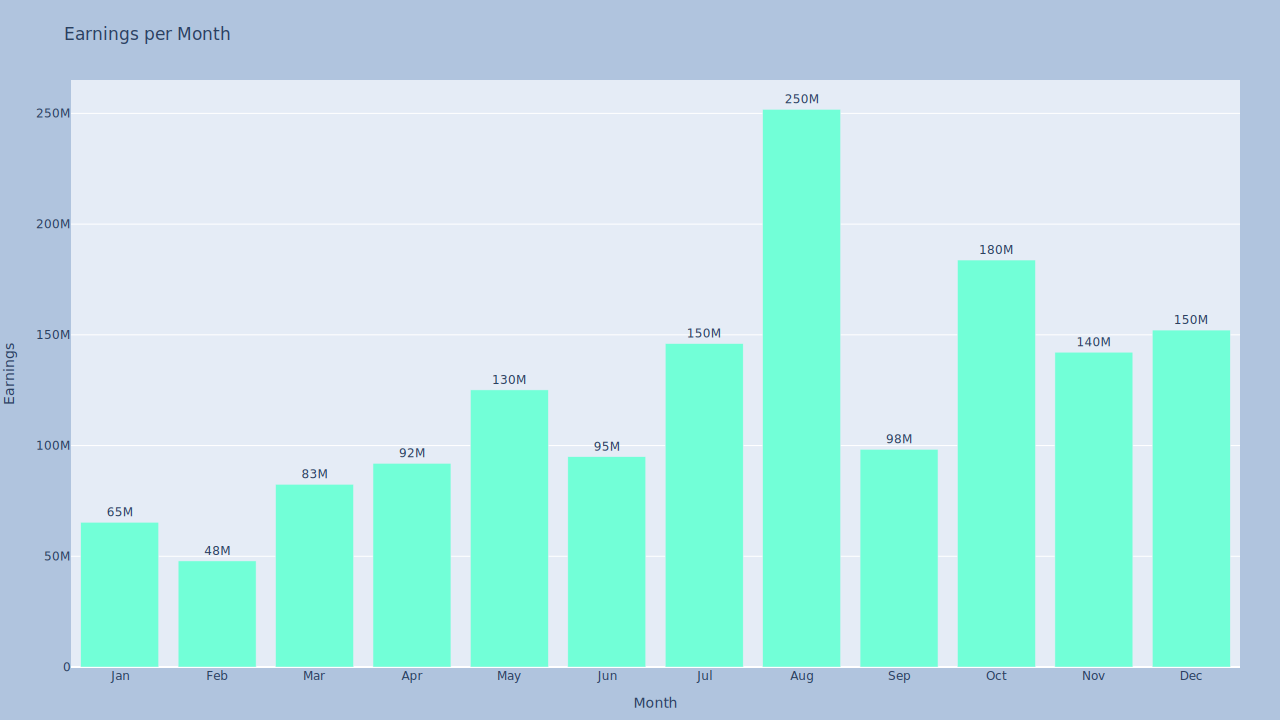

In [73]:
# Plot Earnings per Month from historical_esports_data
fig = px.bar(historical_esports_data.groupby('Month').sum().reset_index(),
                x='Month', y='Earnings',
                title='Earnings per Month',
                width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")

# Show the Earnings in thousands outside the bars with 2 decimal places
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside')
# Change the color of the bars to #72FFD7
fig.update_traces(marker_color='#72FFD7')
# Change the x-axis tick labels to display the month name instead of the month number
fig.update_xaxes(ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Display the figure
fig.show()

# fig.write_image("fig9.png")

# py.plot(fig, filename='esports_fig9')

There is a clear pattern in the earnings by month. The earnings are concentrated in the months of August and October. This is probably due to the fact that the most important tournaments are held in these months.

C:\Users\arthu\AppData\Local\Temp\ipykernel_17608\3269510430.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



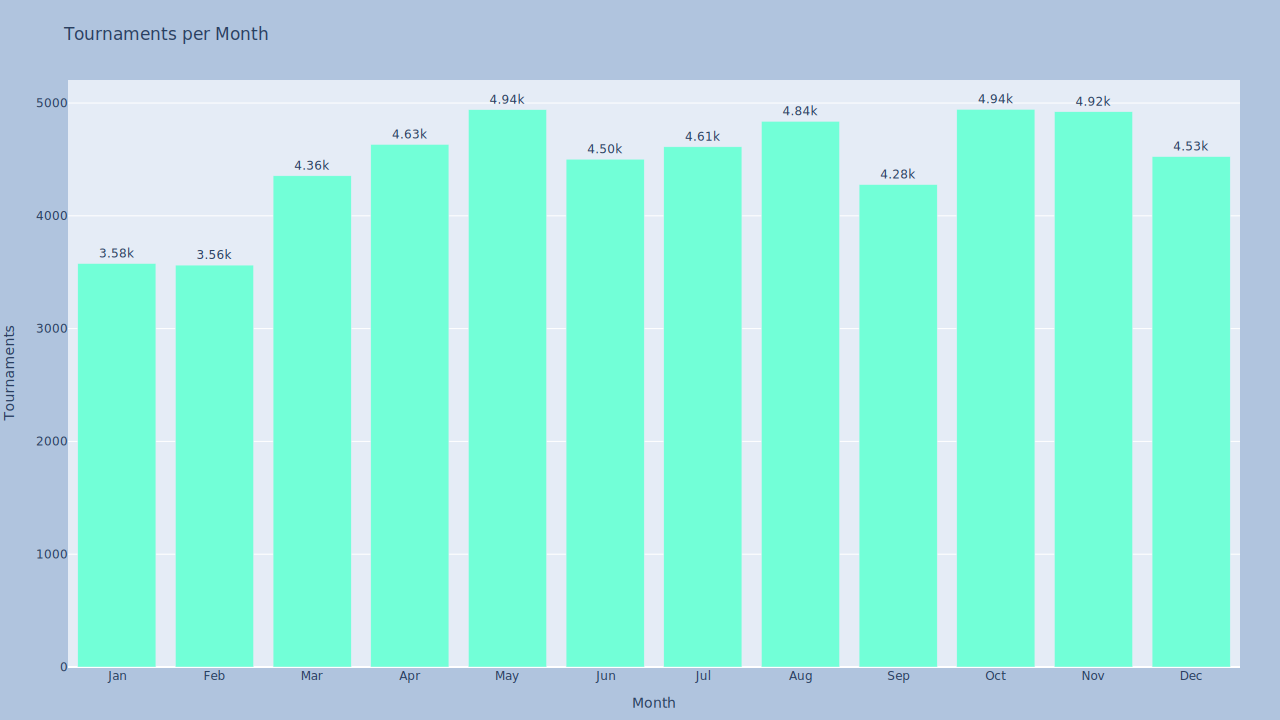

In [74]:
# Plot Tournaments per Month from historical_esports_data
fig = px.bar(historical_esports_data.groupby('Month').sum().reset_index(),
                x='Month', y='Tournaments',
                title='Tournaments per Month',
                width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")

# Show the Earnings in thousands outside the bars with 2 decimal places
fig.update_traces(texttemplate='%{y:.3s}', textposition='outside')
# Change the color of the bars to #72FFD7
fig.update_traces(marker_color='#72FFD7')
# Change the x-axis tick labels to display the month name instead of the month number
fig.update_xaxes(ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Display the figure
fig.show()

# fig.write_image("fig10.png")

# py.plot(fig, filename='esports_fig10')

Regarding the tournaments, the beginning of the year is the less active period, with the number of tournaments increasing from March and April.

### 3.5 Games that distribute prizes for the most players

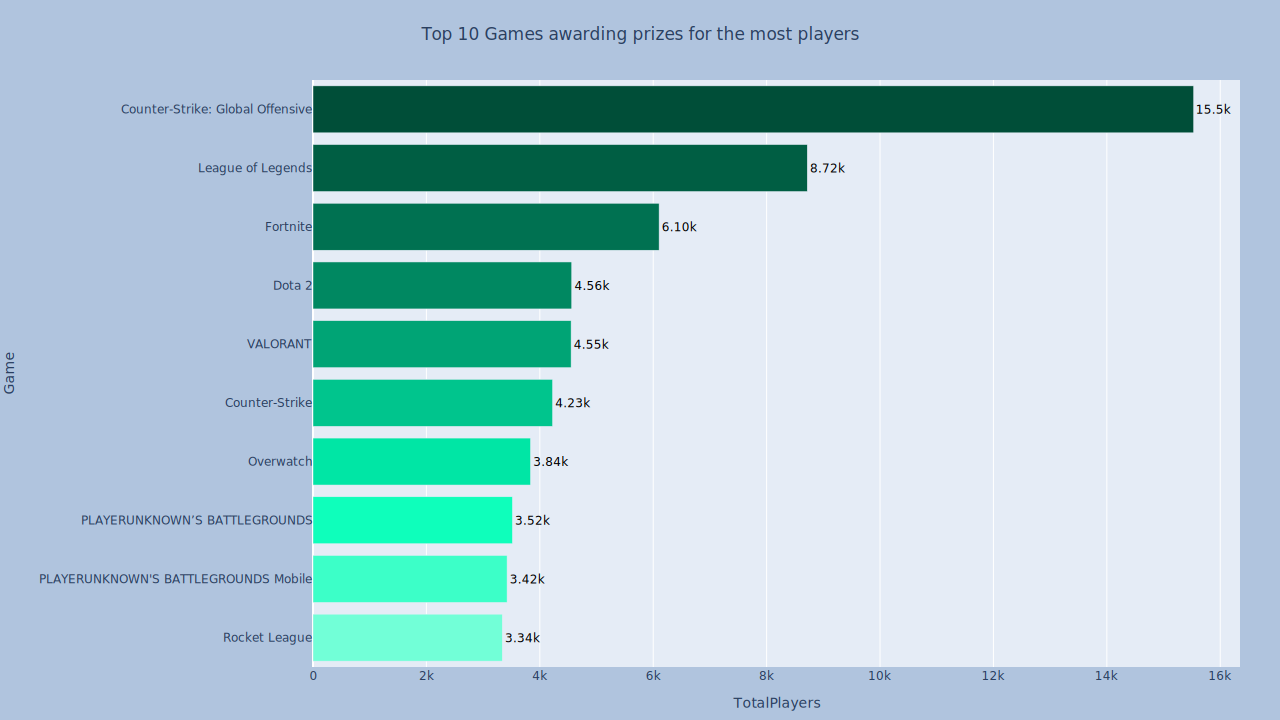

In [75]:
# Plot the top 10 games with the highest player in general_esports_data
fig = px.bar(general_esports_data.nlargest(10, 'TotalPlayers'),
                x='TotalPlayers', y='Game', orientation='h',
                title='Top 10 Games awarding prizes for the most players',
                width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")

# Centralize the title
fig.update_layout(title_x=0.5)
# Order the bars by the Total Earnings
fig.update_yaxes(categoryorder='total ascending')
# Display the Total Players in thousands inside the bars with 2 decimal places
# And set the text color to black
fig.update_traces(texttemplate='%{x:.3s}', textposition='outside', textfont_color='black')
# Define bar color to be dark dark green to light green
fig.update_traces(marker_color=['#004E38', '#005E43', '#007151', '#008861', '#00A475', '#00C58D', '#00E6A5', '#0EFFBB', '#3CFFC8', '#72FFD7'])

# Display the figure
fig.show()

# fig.write_image("fig11.png")

# py.plot(fig, filename='esports_fig11')

There is interesting to observe that the majority of the games are played in teams of 5 players (LOL, Dota 2, CS:GO) or are part of the Battle Royal genre (Fortnite, PUBG), which is a genre that is played in 100 players for each match.  

### 3.6 Earnings by Genre

C:\Users\arthu\AppData\Local\Temp\ipykernel_17608\1205545690.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



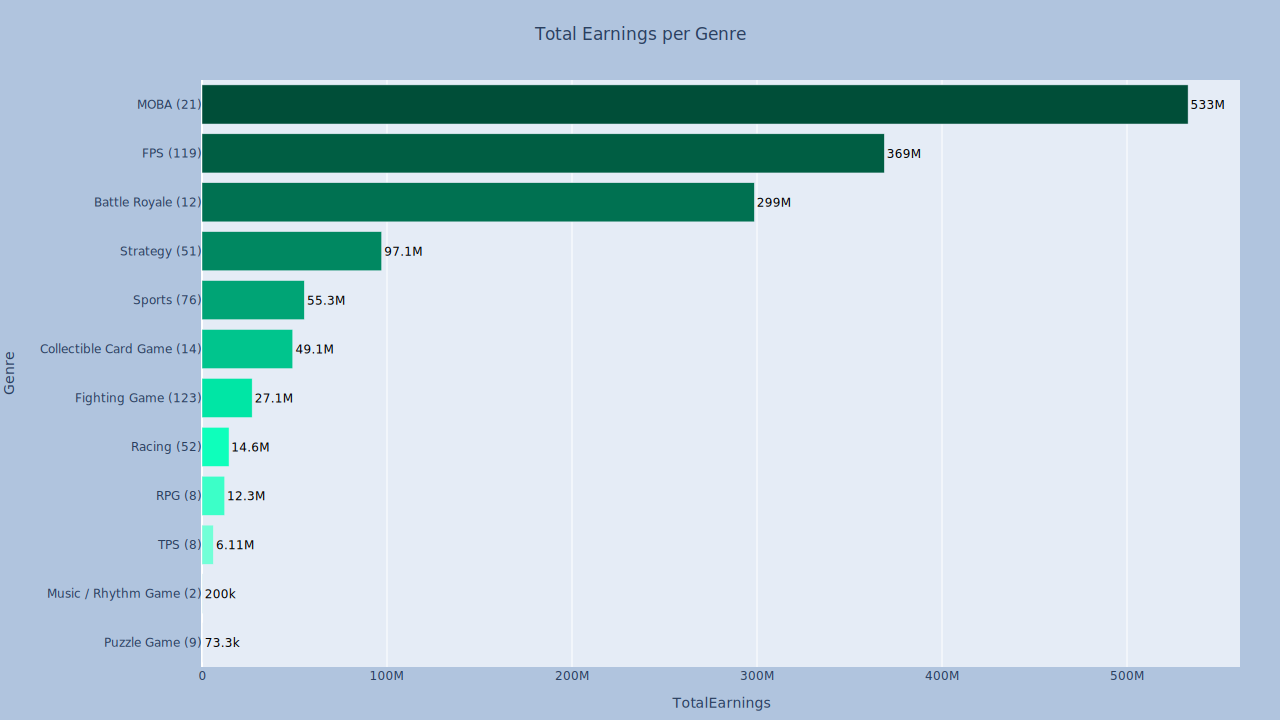

In [76]:
# Plot Total Earnings per Genre from general_esports_data
fig = px.bar(general_esports_data.groupby('Genre').sum().reset_index(),
                x='TotalEarnings', y='Genre', orientation='h',
                title='Total Earnings per Genre',
                width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")

# Order the bars by the Total Earnings
fig.update_yaxes(categoryorder='total ascending')
# Centralize the title
fig.update_layout(title_x=0.5)
# Add to y-axis number of games in each genre
fig.update_yaxes(ticktext=['%s (%s)' % (genre, count) for genre, count in zip(general_esports_data.groupby('Genre').count().reset_index()['Genre'], general_esports_data.groupby('Genre').count().reset_index()['Game'])], tickvals=general_esports_data.groupby('Genre').count().reset_index()['Genre'])
# Display the Total Earnings in millions outside the bars with 2 decimal places
# And set the text color to black
fig.update_traces(texttemplate='%{x:.3s}', textposition='outside', textfont_color='black')
# Define bar color to be dark dark green to light green
fig.update_traces(marker_color=['#007151', '#00C58D', '#005E43', '#00E6A5', '#004E38', '#B1FFE9', '#FAFFFE', '#3CFFC8', '#0EFFBB', '#00A475', '#008861', '#72FFD7'])

# Display the figure
fig.show()

# fig.write_image("fig12.png")

# py.plot(fig, filename='esports_fig12')

C:\Users\arthu\AppData\Local\Temp\ipykernel_17608\191082471.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



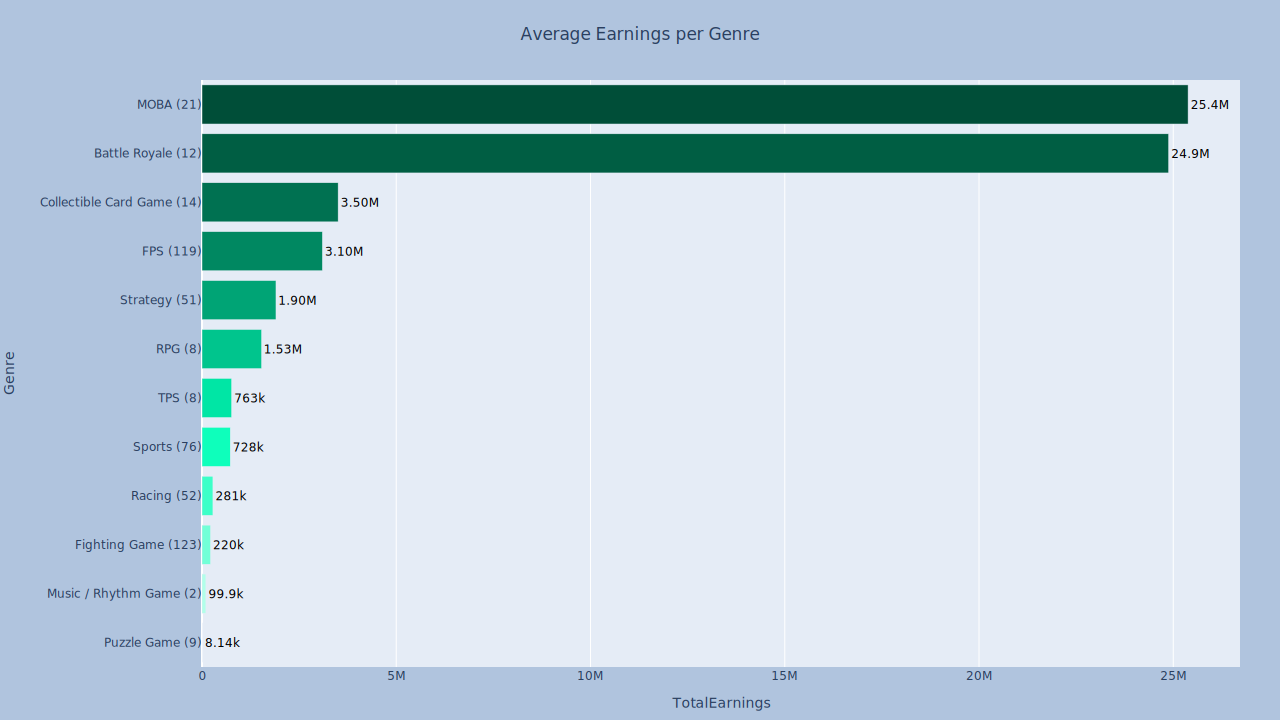

In [77]:
# Plot Average Earnings per Genre from general_esports_data
fig = px.bar(general_esports_data.groupby('Genre').mean().reset_index(),
                x='TotalEarnings', y='Genre', orientation='h',
                title='Average Earnings per Genre',
                width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")

# Order the bars by the Total Earnings
fig.update_yaxes(categoryorder='total ascending')
# Centralize the title
fig.update_layout(title_x=0.5)
# Add to y-axis number of games in each genre
fig.update_yaxes(ticktext=['%s (%s)' % (genre, count) for genre, count in zip(general_esports_data.groupby('Genre').count().reset_index()['Genre'], general_esports_data.groupby('Genre').count().reset_index()['Game'])], tickvals=general_esports_data.groupby('Genre').count().reset_index()['Genre'])
# Display the Total Earnings in millions outside the bars with 2 decimal places
# And set the text color to black
fig.update_traces(texttemplate='%{x:.3s}', textposition='outside', textfont_color='black')
# Define bar color to be dark dark green to light green
fig.update_traces(marker_color=['#005E43', '#007151', '#008861', '#72FFD7', '#004E38', '#B1FFE9', '#FAFFFE', '#00C58D', '#3CFFC8', '#0EFFBB', '#00A475', '#00E6A5'])

# Display the figure
fig.show()

# fig.write_image("fig13.png")

# py.plot(fig, filename='esports_fig13')

The genre with the highest earnings as expected is the MOBA, followed by the FPS and Battle Royal. This is probably due to the fact that the this genres were projected to the esports scenario and have a lot of tournaments and prize money.

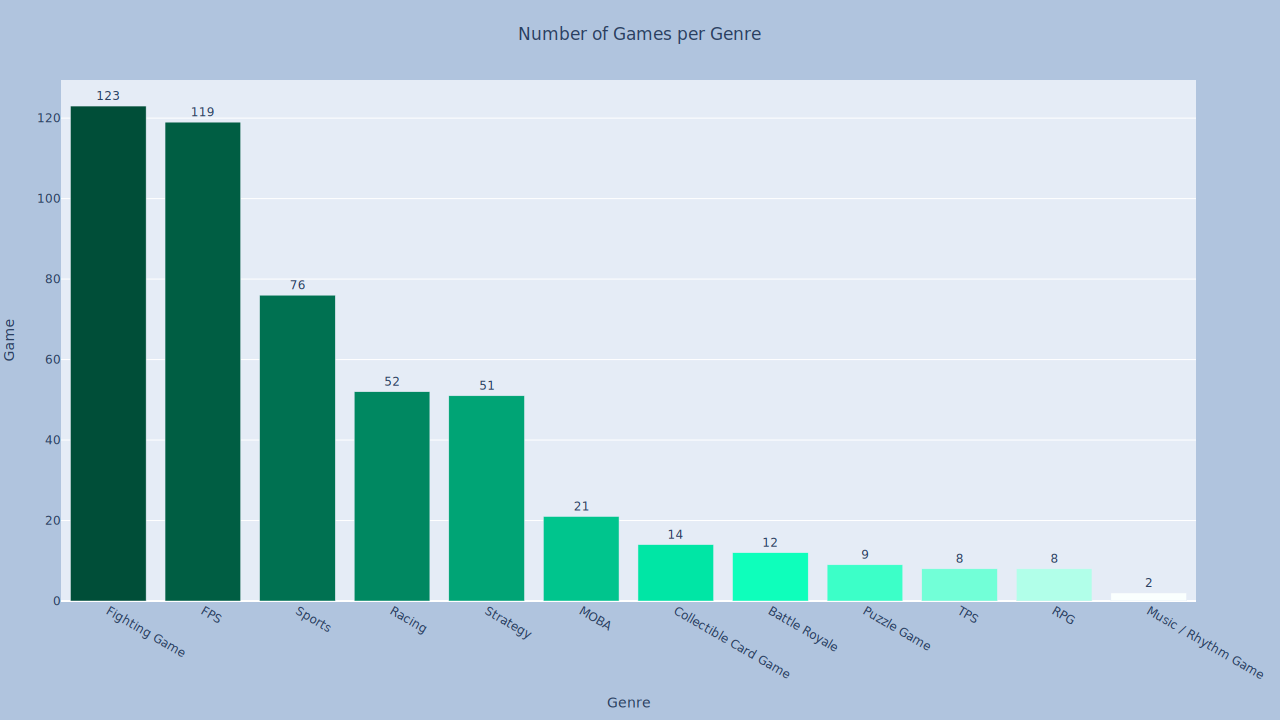

In [78]:
# Plot the numbers of games per genre from general_esports_data
fig = px.bar(general_esports_data.groupby('Genre').count().reset_index(),
                x='Genre', y='Game', orientation='v',
                title='Number of Games per Genre',
                width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")

# Centralize the title
fig.update_layout(title_x=0.5)
# ORder the bars by crescent number of games from right to left
fig.update_xaxes(categoryorder='total descending')
# Show the number of games outside the bars
fig.update_traces(texttemplate='%{y}', textposition='outside')
# Define bar color to be dark dark green to light green according to the total in descending order
fig.update_traces(marker_color=['#0EFFBB', '#00E6A5', '#005E43', '#004E38', '#00C58D', '#FAFFFE', '#3CFFC8', '#B1FFE9', '#008861', '#007151', '#00A475', '#72FFD7'])

# Display the figure
fig.show()

# fig.write_image("fig14.png")

# py.plot(fig, filename='esports_fig14')

Regarding the number of games in each genre, is not a surprise that Fighting, FPS and Sports are the genres with the highest number of games, once these genres are more franchise and are released more often. 

C:\Users\arthu\AppData\Local\Temp\ipykernel_17608\3694730896.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



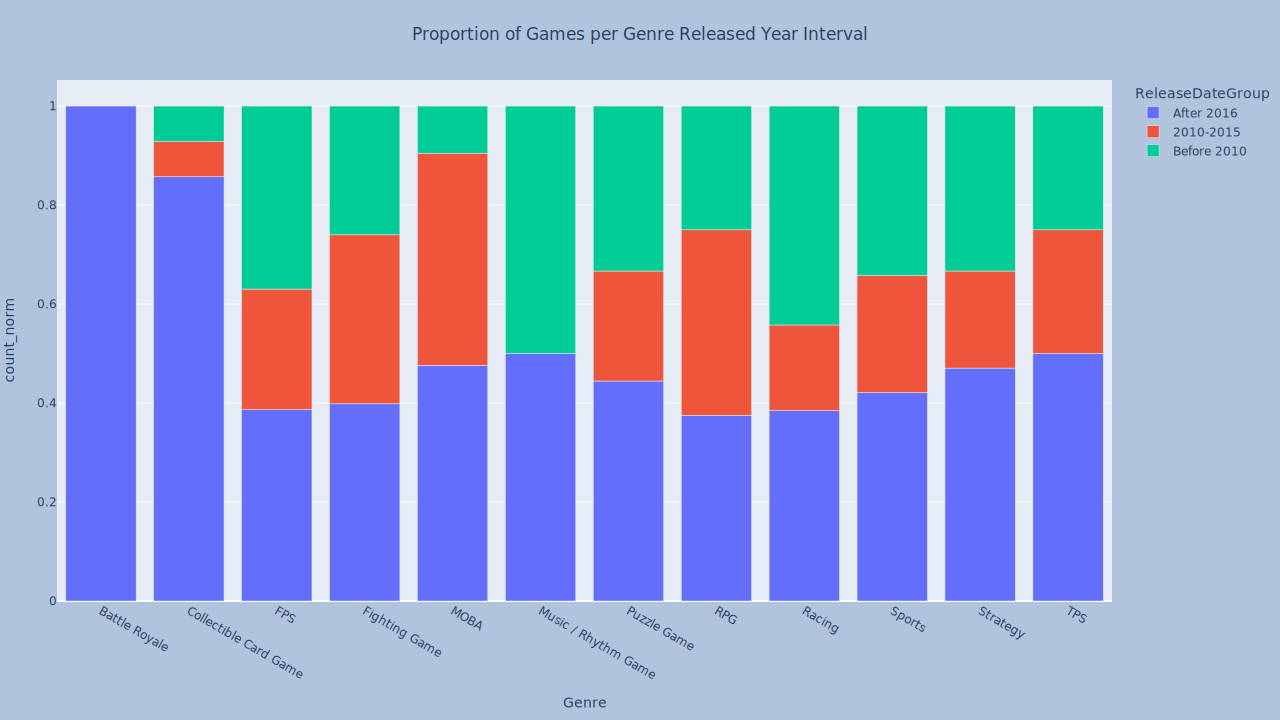

In [79]:
# Group the ReleaseDate to before 2010, 2010-2015, and after 2015
# Create a new column called ReleaseDateGroup
general_esports_data['ReleaseDateGroup'] = general_esports_data.loc[:, 'ReleaseDate'].apply(lambda x: 'Before 2010' if x < 2010 else ('2010-2015' if x < 2016 else 'After 2016'))
general_esports_data_grouped = general_esports_data.groupby(['Genre', 'ReleaseDateGroup']).size().reset_index(name='count')
general_esports_data_grouped['count_norm'] = general_esports_data_grouped['count'] / general_esports_data_grouped.groupby('Genre')['count'].transform('sum')

# Plot the proportion of games per genre released in year intervals with normalized values
fig = px.bar(general_esports_data_grouped, x='Genre', y='count_norm', color='ReleaseDateGroup',
                title='Proportion of Games per Genre Released Year Interval',
                width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")

# Centralize the title
fig.update_layout(title_x=0.5)


# Display the figure
fig.show()

# fig.write_image("fig15.png")

# py.plot(fig, filename='esports_fig15')

There is interesting to observe that the top 2 games with the highest earnings are in the MOBA and Battle Royal genres, which appears mostly after 2015. This is probably due to the fact that these genres were designed to the esports scenario.

### 3.7 Game Release Date

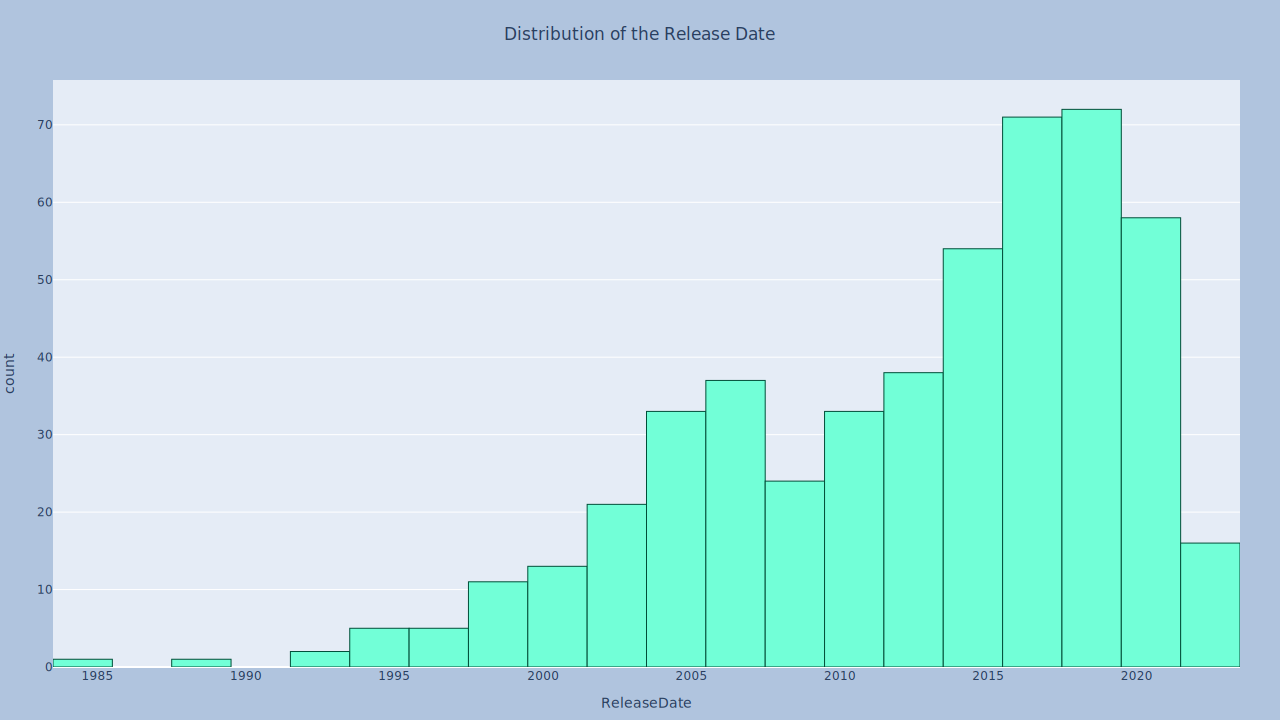

In [80]:
# Plot the distribution of the release date
fig = px.histogram(general_esports_data, x='ReleaseDate', nbins=20,
                title='Distribution of the Release Date',
                width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")

# Centralize the title
fig.update_layout(title_x=0.5)
# Change th color of bars to #72FFD7
fig.update_traces(marker_color='#72FFD7')
# Add borders to the bars
fig.update_traces(marker_line_color='#004E38', marker_line_width=1)

#Display the figure
fig.show()

# fig.write_image("fig16.png")

# py.plot(fig, filename='esports_fig16')

It is possible to observe that the Realeases had two falls, the first in the economic crisis of 2007-2008 and the other in the pandemic period.

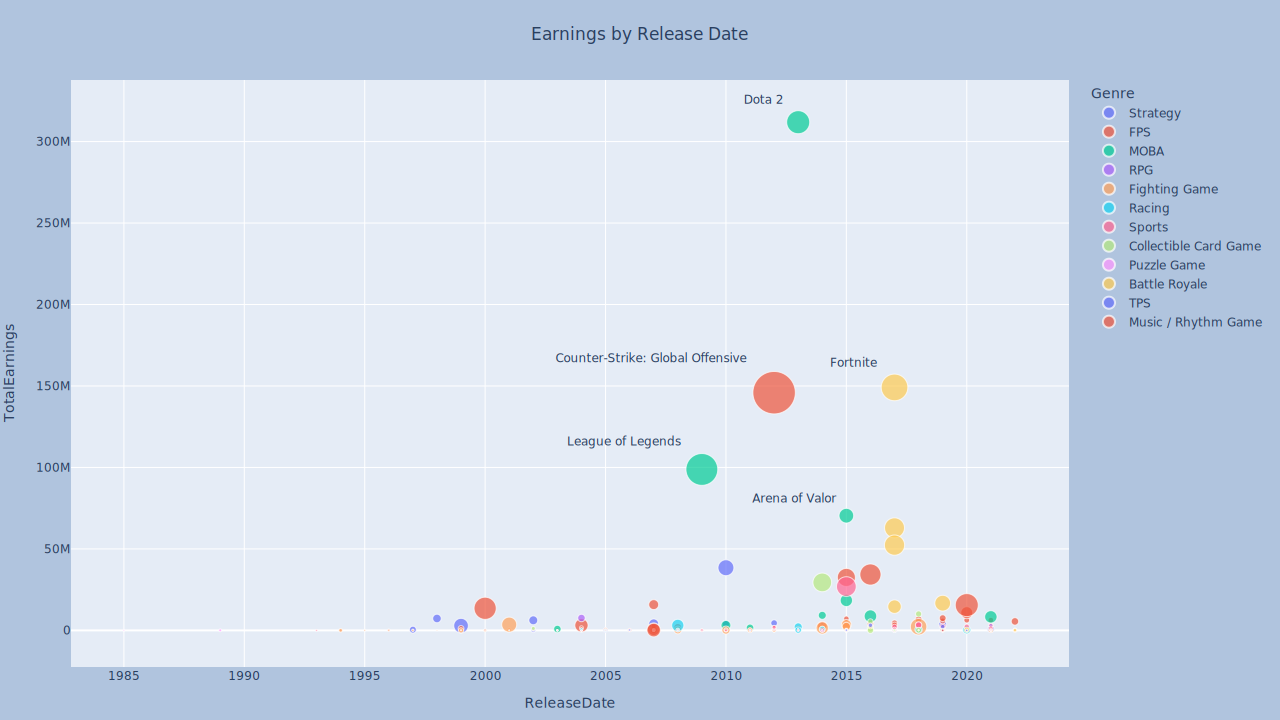

In [81]:
# Filter the top 5 games with the highest earnings
top_5_games = general_esports_data.nlargest(5, 'TotalEarnings')['Game']
# Text to be displayed in the scatter plot considering the top 5 games
text = [game if game in top_5_games.values else '' for game in general_esports_data['Game']]

# Plot the Earnings by Release Date from general_esports_data
# Consider game and genre
fig = px.scatter(general_esports_data, x='ReleaseDate', y='TotalEarnings', color='Genre', size='TotalPlayers',
                hover_name='Game', text=text, size_max=30, title='Earnings by Release Date',
                width=1280, height=720)

fig.update_layout(
    margin=dict(l=40, r=40, t=80, b=40),
    paper_bgcolor="LightSteelBlue")

# Centralize the title
fig.update_layout(title_x=0.5)
# Change the text position to top left
fig.update_traces(textposition='top left')

# Display the figure
fig.show()

# fig.write_image("fig17.png")

# py.plot(fig, filename='esports_fig17')

It is possible to seem that is no correlation between the release date and the success of the game. The games with the highest earnings were released in different years.

## 4 Conclusions

      The insights of this analysis are:
    
      * The prizes are concentrated between few games, but the tournaments are more distributed.
      * Dota 2 is the game with the highest earnings and Starcraft II is the game with the highest number of tournaments.
      * The number of tournaments and earnings increased over time.
      * The earnings are concentrated in the months of August and October.
      * Tournaments are lower in january and february, and increase from March and April continuing steadily until the end of the year.
      * The Esports industry is mainly dominated by the MOBA and Battle Royal genres.
      * There is not a correlation between the release date and the success of the game.
      * The Economic crisis of 2007-2008 and the pandemic of 2020 affected the number of earnings and tournaments, but the industry is resilient and is able to overcome adversities.
      * Finally, the Esports industry is growing and is expected to continue growing in the future, with a lot of opportunities for the future. Then, it will be interesting to see how the industry will evolve in the future.